# Titanic Survival Prediction

Import some basic libraries.
* Pandas - provided data frames
* matplotlib.pyplot - plotting support

Use Magic %matplotlib to display graphics inline instead of in a popup window.


In [261]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data

%matplotlib inline

## Loading and Reviewing the Data

In [262]:
df = pd.read_csv("train.csv")

In [263]:
df.shape

(891, 9)

In [264]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [265]:
df.tail(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,male,27.0,0,0,13.00,S
887,888,1,1,female,19.0,0,0,30.00,S
888,889,0,3,female,NaN,1,2,23.45,S
889,890,1,1,male,26.0,0,0,30.00,C
890,891,0,3,male,32.0,0,0,7.75,Q


## Check for null values

In [266]:
df.isnull().values.any()


True

### Correlated Feature Check

In [267]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


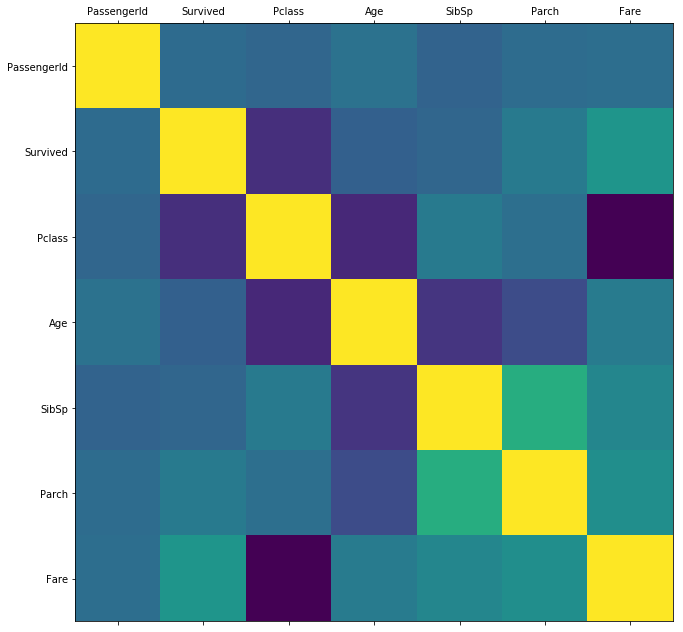

In [268]:
plot_corr(df)

In [269]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [270]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


The correlations look good.  There appear to be no coorelated columns.

## Mold Data

### Data Types

Inspect data types to see if there are any issues.  Data should be numeric.

In [271]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Change Embarked from string to integer

In [272]:
embarked_map = {'S' : 1, 'C' : 2, 'Q' : 3}
df['Embarked'] = df['Embarked'].map(embarked_map)
sex_map = {'male' : 2, 'female' : 1}
df['Sex'] = df['Sex'].map(sex_map)
se_map = { 1: 1, 0 : 2}
df['SibSp'] = df['SibSp'].map(se_map)
s_map = { 1:1, 0:2}
df['Survived'] = df['Survived'].map(s_map)


Verify that the titanic data type has been changed.

In [273]:
df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,3,2,22.0,1.0,0,7.2500,1.0
1,2,1,1,1,38.0,1.0,0,71.2833,2.0
2,3,1,3,1,26.0,2.0,0,7.9250,1.0
3,4,1,1,1,35.0,1.0,0,53.1000,1.0
4,5,2,3,2,35.0,2.0,0,8.0500,1.0
5,6,2,3,2,NaN,2.0,0,8.4583,3.0
6,7,2,1,2,54.0,2.0,0,51.8625,1.0
7,8,2,3,2,2.0,NaN,1,21.0750,1.0
8,9,1,3,1,27.0,2.0,2,11.1333,1.0
9,10,1,2,1,14.0,1.0,0,30.0708,2.0


### Check for null values

In [274]:
df.isnull().values.any()

True

No obvious null values.

### Check class distribution 

Rare events are hard to predict

In [275]:
num_obs = len(df)
num_s = len(df.loc[df['Embarked'] == 1])
num_c = len(df.loc[df['Embarked'] == 0])
num_q = len(df.loc[df['Embarked'] == 2])
print("Number of S cases:  {0} ({1:2.2f}%)".format(num_s, (num_s/num_obs) * 100))
print("Number of C cases: {0} ({1:2.2f}%)".format(num_c, (num_c/num_obs) * 100))
print("Number of Q cases: {0} ({1:2.2f}%)".format(num_q, (num_q/num_obs) * 100))

Number of S cases:  644 (72.28%)
Number of C cases: 0 (0.00%)
Number of Q cases: 168 (18.86%)


In [289]:
num_s = len(df.loc[df['Sex'] == 1])
num_q = len(df.loc[df['Sex'] == 2])
print("Number of female cases:  {0} ({1:2.2f}%)".format(num_s, (num_s/num_obs) * 100))
print("Number of male cases: {0} ({1:2.2f}%)".format(num_q, (num_q/num_obs) * 100))

Number of female cases:  314 (35.24%)
Number of male cases: 577 (64.76%)


Good distribution of true and false cases.  No special work needed.

### Spliting the data 

70% for training, 30% for testing

In [276]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
predicted_class_names = ['Survived']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

We check to ensure we have the the desired 70% train, 30% test split of the data

In [277]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


#### Male = 1 , Female = 0

In [278]:
print(X_train)

[[ 446.        1.        2.     ...,    2.       81.8583    1.    ]
 [ 651.        3.        2.     ...,    0.        7.8958    1.    ]
 [ 173.        3.        1.     ...,    1.       11.1333    1.    ]
 ..., 
 [ 861.        3.        2.     ...,    0.       14.1083    1.    ]
 [ 436.        1.        1.     ...,    2.      120.        1.    ]
 [ 103.        1.        2.     ...,    1.       77.2875    1.    ]]


In [279]:
print(X_test)

[[ 710.        3.        2.     ...,    1.       15.2458    2.    ]
 [ 440.        2.        2.     ...,    0.       10.5       1.    ]
 [ 841.        3.        2.     ...,    0.        7.925     1.    ]
 ..., 
 [ 457.        1.        2.     ...,    0.       26.55      1.    ]
 [ 501.        3.        2.     ...,    0.        8.6625    1.    ]
 [ 431.        1.        2.     ...,    0.       26.55      1.    ]]


In [280]:
print (y_train)

[[1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [2]


In [281]:
df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,3,2,22.0,1.0,0,7.2500,1.0
1,2,1,1,1,38.0,1.0,0,71.2833,2.0
2,3,1,3,1,26.0,2.0,0,7.9250,1.0
3,4,1,1,1,35.0,1.0,0,53.1000,1.0
4,5,2,3,2,35.0,2.0,0,8.0500,1.0
5,6,2,3,2,NaN,2.0,0,8.4583,3.0
6,7,2,1,2,54.0,2.0,0,51.8625,1.0
7,8,2,3,2,2.0,NaN,1,21.0750,1.0
8,9,1,3,1,27.0,2.0,2,11.1333,1.0
9,10,1,2,1,14.0,1.0,0,30.0708,2.0


#### Impute with the mean

In [282]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

C:\Users\Parveen\Anaconda3\lib\site-packages\numpy\ma\core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


## Training Initial Algorithm - Random Forest

In [283]:
from sklearn.ensemble import RandomForestClassifier

# create Random model object and train it with the data
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

### Performance on Training Data

In [284]:
# predict values using the training data
rf_predict_train = rf_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print()

Accuracy: 0.9872



### Performance on Testing Data

In [285]:
# predict values using the testing data
rf_predict_test = rf_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7910
